# 前言
pytorch的使用方法，第一章学习的是pytorch中向量的输入，如何将普通数组转化为pytorch中的规定格式的数组。最后实现以下线性规划

# 查看pytorch版本

In [1]:
import torch
print(torch.__version__)

1.4.0


# pytorch中的向量（Tensor）及其生成方式

## 1.随机生成 

In [3]:
random_tensor = torch.rand(3,5)
print(random_tensor)

tensor([[0.9465, 0.3782, 0.7209, 0.2407, 0.0663],
        [0.0568, 0.3566, 0.6090, 0.6453, 0.0935],
        [0.1504, 0.4756, 0.9978, 0.7952, 0.0228]])


## 2.生成全0和全1的矩阵

In [4]:
zero_tensor = torch.zeros(3,5)
print(zero_tensor)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [5]:
ones_tensor = torch.ones(3,5)
print(ones_tensor)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


## 3.根据数据直接创建

In [6]:
list = [[1,2,3],
        [4,5,6]]
tensor = torch.tensor(list)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


## 4.Numpy和torch的互相转换

In [8]:
import numpy as np
array = np.array(list)
tensor = torch.from_numpy(array).float()
print(tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [9]:
array = tensor.numpy()
print(array)

[[1. 2. 3.]
 [4. 5. 6.]]


注意：tensor转成numpy时，两个向量共用内存，一个改变另一个也会改变；numpy转成tensor时使用的时拷贝，不会同时改变。

# 手写一个线性回归

## 1.如何反向传播和求导

所有的神经网络都需要进行梯度的反向传播和求导，在纸上很容易实现，但是在代码上体现并不容易，如果我们想要进行求导这个操作，可以这样做：

In [10]:
x = torch.tensor([1.],requires_grad=True)
y = x+2
y.backward()
print('y关于x的导数是：{}，y进行的操作是：{}'.format(x.grad, y.grad_fn))

y关于x的导数是：tensor([1.])，y进行的操作是：<AddBackward0 object at 0x0000021F774D6C50>


首先，在变量声明时我们需要告诉计算机，这个变量是需要进行梯度追踪的：requires_grad=True。其次需要让因变量进行反向传播：y.backward()。最终，通过变量.grad()求出导数

## 2.生成数据集

首先生成50个[0,100]内的随机数：

In [14]:
import random
x = []
for i in range(50):
    x.append(round(random.uniform(0,100), 2))
Train_data_x = torch.tensor(x)

真实的直线设定为y=2*x+3，根据这条直线再随机加上一些偏差，模拟数据集，并用matploit展示出来：

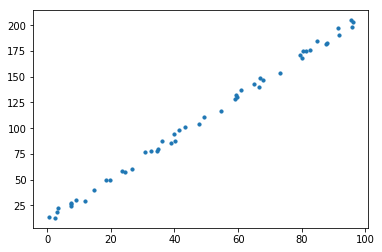

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
true_weight, true_bias = 2, 3
label = Train_data_x * true_weight + true_bias
label += torch.tensor(10*np.random.random(50)+3)
plt.scatter(Train_data_x, label, 10)
plt.show()

有了torch.tensor类型的输入（Train_data_x）和标签(label)后，我们还需把他们转换成模型能读入的数据类型DalaLoader：

In [42]:
import torch.utils.data as Data
dataset = Data.TensorDataset(Train_data_x, label)
dataiter = Data.DataLoader(dataset=dataset,
                           batch_size=10,
                           shuffle=True,)
for x, y in dataiter:
    print(x, '\n', y)

tensor([ 8.9600, 43.2000, 34.3900, 39.9400, 91.3700, 64.8800, 32.5000, 66.9600,
         7.3800, 87.8500]) 
 tensor([ 29.9891, 101.3768,  77.6998,  94.2723, 197.4821, 143.0810,  77.5085,
        148.4566,  24.6664, 183.2752])
tensor([84.9000,  2.5700, 14.7000, 38.8000, 59.0800, 40.0800, 54.5700, 95.5600,
        95.8900, 18.3900]) 
 tensor([184.9252,  12.6410,  39.5457,  85.4456, 128.5162,  87.1056, 116.9533,
        205.0364, 198.0064,  49.7109])
tensor([ 0.4500, 19.7400, 81.3700, 87.4800,  7.3600, 49.2400, 91.6100, 67.8300,
        30.7500, 41.5100]) 
 tensor([ 13.1555,  49.4515, 175.4591, 181.5543,  26.9325, 111.0981, 190.4976,
        147.0613,  77.2011,  98.6023])
tensor([80.4000, 59.6900, 79.5500, 47.6200, 11.7500, 73.2400, 61.0200, 34.9000,
        23.6500, 36.1400]) 
 tensor([175.1518, 130.7014, 171.0392, 104.3937,  29.5268, 153.6101, 136.6791,
         80.0104,  58.6555,  87.7758])
tensor([ 2.9600,  7.5300, 66.4400, 26.7000, 80.1400, 96.0600, 59.3600,  3.3600,
        82.5900,

## 2.定义自己的网络

自定义网络通过torch.nn实现：

In [43]:
from torch import nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

    def forward(self, x):
        y = self.linear(x)
        return y
linear_net = LinearNet(1)
print(linear_net.linear.weight)
print(linear_net.linear.bias)

Parameter containing:
tensor([[0.7037]], requires_grad=True)
Parameter containing:
tensor([-0.6549], requires_grad=True)


## 3.定义损失函数及优化方法

损失函数用均方误差，优化方法用随机梯度下降：

In [44]:
import torch.optim as optim
loss = nn.MSELoss()
optimizer = optim.SGD(linear_net.parameters(), lr=0.00003)

## 4.训练

In [45]:
for i in range(100):
    for input, ground_truth in dataiter:
        output = linear_net(input.view(10, -1))
        l = loss(output, ground_truth.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch{}, loss:{}'.format(i+1, l))

epoch1, loss:1226.679443359375
epoch2, loss:156.35964965820312
epoch3, loss:49.32404327392578
epoch4, loss:61.44105911254883
epoch5, loss:35.276912689208984
epoch6, loss:49.68880081176758
epoch7, loss:31.92144775390625
epoch8, loss:37.58811950683594
epoch9, loss:31.979211807250977
epoch10, loss:33.45459747314453
epoch11, loss:33.64426803588867
epoch12, loss:23.567359924316406
epoch13, loss:30.947345733642578
epoch14, loss:66.07997131347656
epoch15, loss:48.456871032714844
epoch16, loss:55.4990234375
epoch17, loss:25.984577178955078
epoch18, loss:56.57416534423828
epoch19, loss:45.68144989013672
epoch20, loss:35.94047164916992
epoch21, loss:49.1015625
epoch22, loss:23.511816024780273
epoch23, loss:53.051963806152344
epoch24, loss:91.90177154541016
epoch25, loss:64.89215087890625
epoch26, loss:46.8785400390625
epoch27, loss:65.24182891845703
epoch28, loss:27.638891220092773
epoch29, loss:22.36319351196289
epoch30, loss:69.99288940429688
epoch31, loss:43.51637268066406
epoch32, loss:45.49

## 5.结果

In [46]:
print(linear_net.linear.weight, linear_net.linear.bias)

Parameter containing:
tensor([[2.1709]], requires_grad=True) Parameter containing:
tensor([-0.5341], requires_grad=True)


weight还行，但是bias不太好，不知道为什么